  Source Target
0      A      B
1      A      C
2      B      C
3      B      D
4      C      E
Column names: Index(['Source', 'Target'], dtype='object')


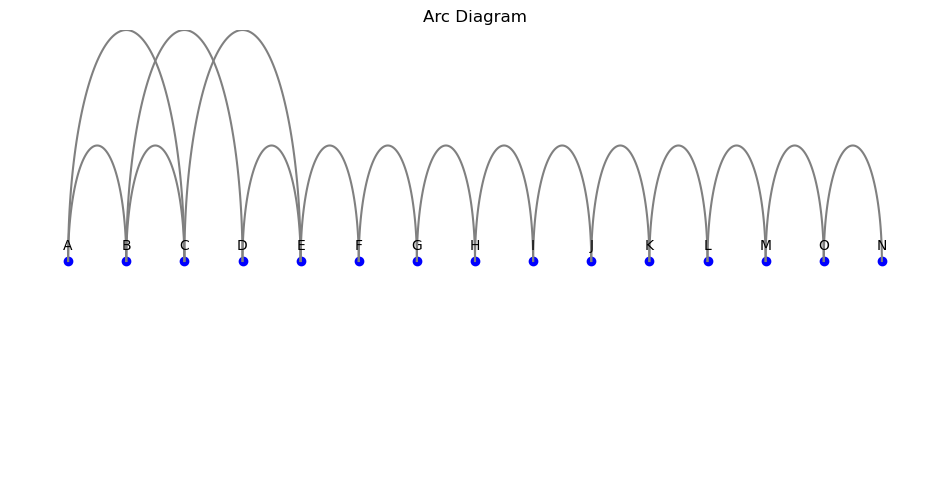

In [13]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('arc.csv')
print(df.head())
print("Column names:", df.columns)
G = nx.Graph()
source_col = 'Source'  
target_col = 'Target' 

for index, row in df.iterrows():
    G.add_edge(row[source_col], row[target_col])
nodes = list(G.nodes())
pos = {node: (i, 1) for i, node in enumerate(nodes)}

fig, ax = plt.subplots(figsize=(12, 6))
x_coords = np.arange(len(nodes))
ax.plot(x_coords, [1] * len(nodes), 'bo')
for i, node in enumerate(nodes):
    ax.text(i, 1.05, node, ha='center')
for edge in G.edges():
    x0 = nodes.index(edge[0])
    x1 = nodes.index(edge[1])
    radius = abs(x1 - x0) / 2
    center = (x0 + x1) / 2
    theta = np.linspace(0, np.pi, 100)
    x_arc = center + radius * np.cos(theta)
    y_arc = 1 + radius * np.sin(theta)
    ax.plot(x_arc, y_arc, color='grey')
ax.set_xlim(-1, len(nodes))
ax.set_ylim(0, 2)
ax.axis('off')
plt.title('Arc Diagram')
plt.show()
